In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df_t = pd.read_csv('test.csv')
df_sample = pd.read_csv('sample_submission.csv')

# Podcast Listening Time - EDA
- Dataset analysis
- Numerical analysis / Categorical analysis
- Correlation analysis

In [3]:
df.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')

In [4]:
df.dtypes

id                               int64
Podcast_Name                    object
Episode_Title                   object
Episode_Length_minutes         float64
Genre                           object
Host_Popularity_percentage     float64
Publication_Day                 object
Publication_Time                object
Guest_Popularity_percentage    float64
Number_of_Ads                  float64
Episode_Sentiment               object
Listening_Time_minutes         float64
dtype: object

In [5]:
df.head(3)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.8,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.9,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531


In [6]:
df.tail(3)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939
749999,749999,Sports Central,Episode 99,24.10,Sports,22.45,Saturday,Night,36.72,0.0,Neutral,11.94439


In [7]:
df.shape

(750000, 12)

In [8]:
df.isnull().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [9]:
num_cols = df.select_dtypes(include=['float64','int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
print(len(num_cols))
print(len(cat_cols))

6
6


In [15]:
df.duplicated().sum()

0

# Observations

- There are 750000 rows of data and 12 columns
- Of the 12 columns, there is 1 id column and 1 target column, meaning 10 feature columns
- There are 4 numerical columns and 6 categorical columns
- There are missing values in the 'Episode_Length_minutes and Guest_Populatiry_percentage columns, and 1 in the Number_of_Ads column
- No duplicates

# Preprocessor
- For data cleaning
- Will be used in modelling
- All cleaning occurs in preprocessor only
- All feature engineering occurs here as well

In [ ]:
def preprocessor(df):
    X = df.copy()

    # Feature Engineering
    # Remove unnecessary columns 
    X = X.drop(columns=['id'])

# Numerical Feature Analysis
- Histogram, boxplots
- Describe 

In [10]:
def num_analysis(cols,df):
    fig,axs = plt.subplots(len(cols),2,figsize=(20,5*len(cols)))
    for i,col in enumerate(cols):
        axs[i,0].set_title(f'{col} histplot')
        sns.histplot(df,x=col,ax=axs[i,0],kde=True)
        axs[i,1].set_title(f'{col} boxplot')
        sns.boxplot(df,x=col,ax=axs[i,1])
    plt.tight_layout()
    plt.show()

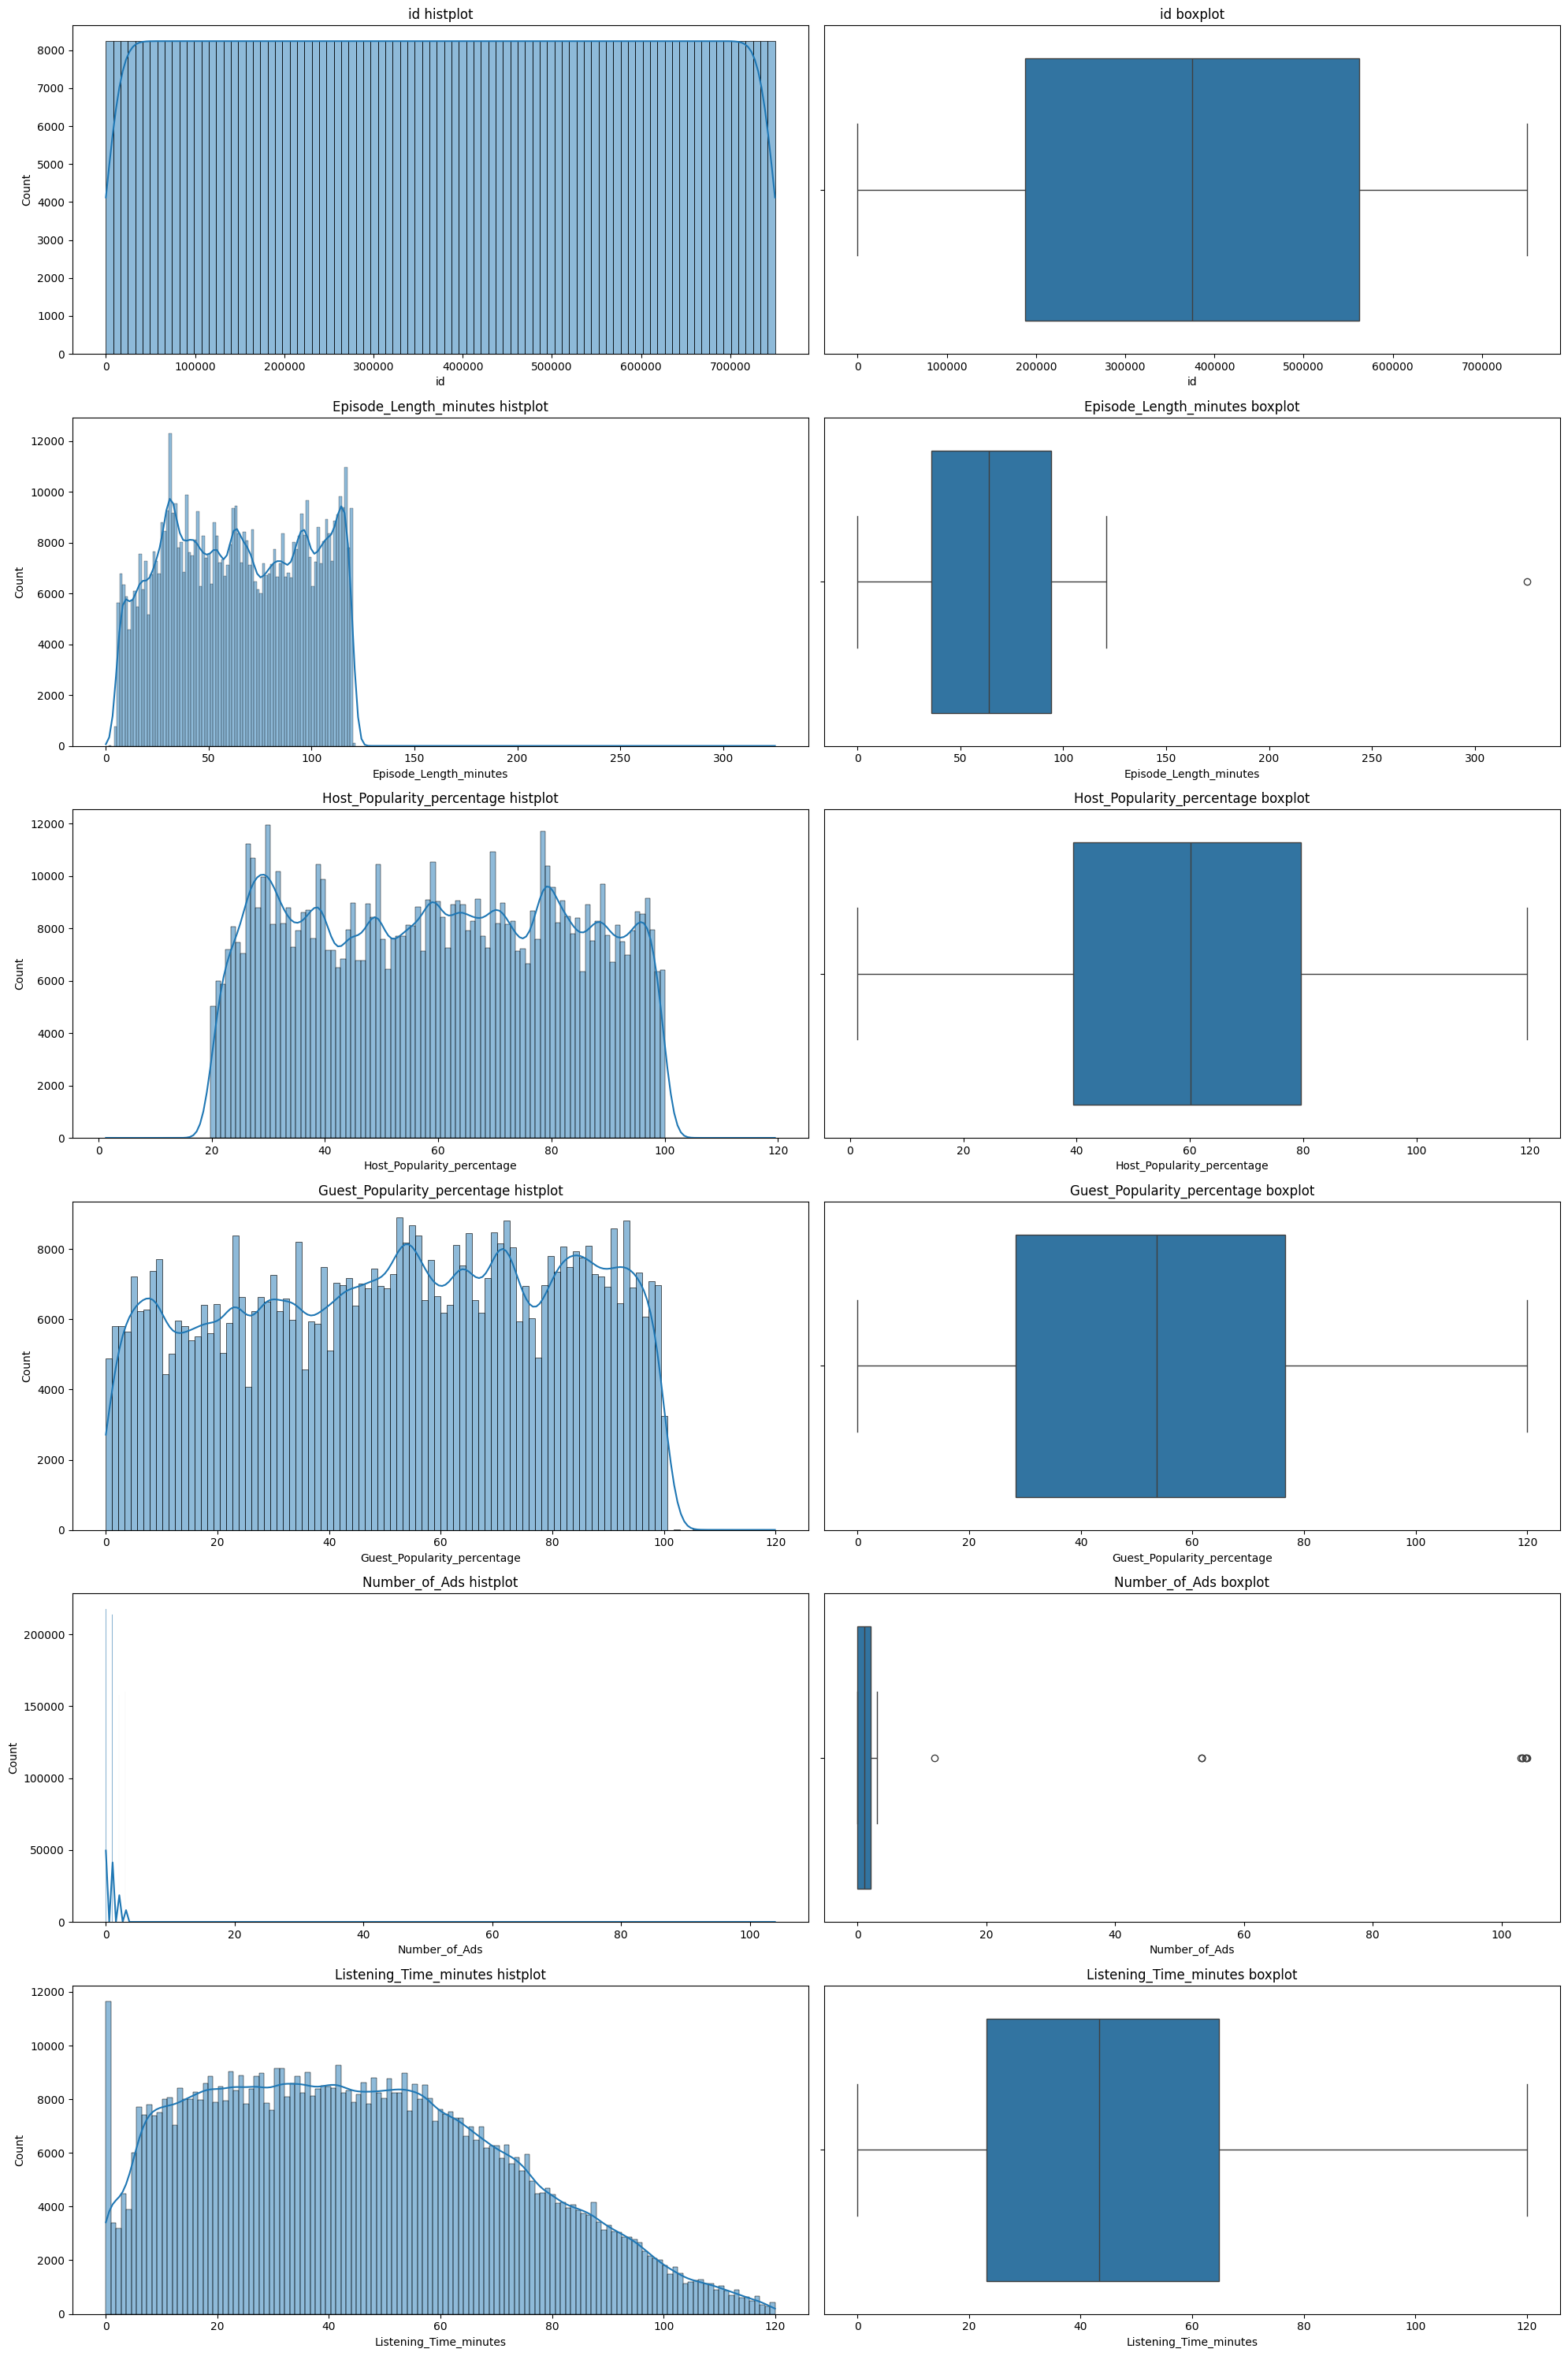

In [11]:
num_analysis(num_cols,df)

In [17]:
df[df['Number_of_Ads']>0.75*df['Number_of_Ads'].max()]

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
283606,283606,Health Hour,Episode 15,109.93,Health,67.81,Sunday,Morning,77.90,103.91,Neutral,103.89696
436577,436577,Sports Central,Episode 64,115.25,Sports,28.58,Saturday,Afternoon,23.65,103.00,Neutral,103.12686
537705,537705,Sound Waves,Episode 64,112.27,Music,28.95,Saturday,Morning,10.15,103.75,Neutral,103.12686
602553,602553,Sound Waves,Episode 53,112.27,Music,28.19,Tuesday,Morning,23.15,103.25,Neutral,103.12686
672139,672139,Sound Waves,Episode 35,115.74,Music,28.95,Tuesday,Afternoon,23.50,103.25,Neutral,103.12686
683147,683147,Crime Chronicles,Episode 15,109.93,True Crime,59.66,Tuesday,Evening,77.91,103.88,Neutral,103.89696


In [14]:
df[num_cols].describe().style.background_gradient(cmap='cool')

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


# Observations
- Major outlier in episode length minutes (325) when average is 64 --> Potentially remove data point
- Host and guest popularity are quite uniformly distributed --> Scale as per normal
- Number of ads has some major outliers --> 

<Axes: >

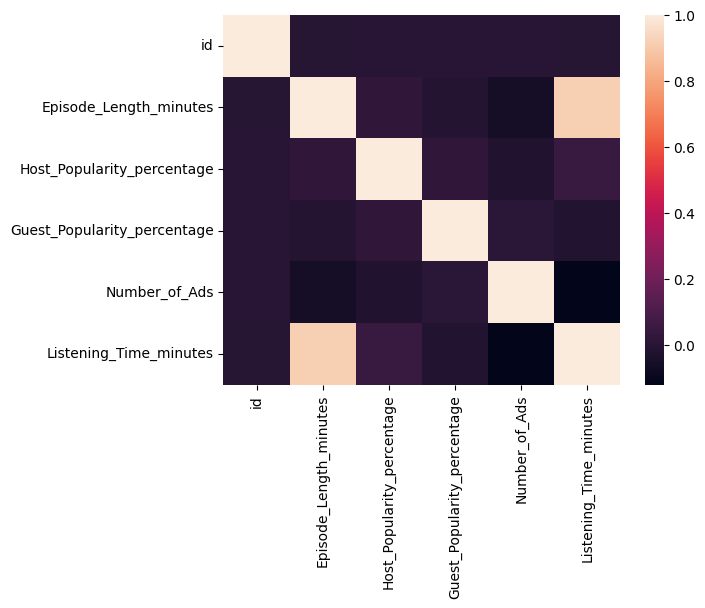

In [12]:
df_corr = df[num_cols].corr()
sns.heatmap(df_corr)



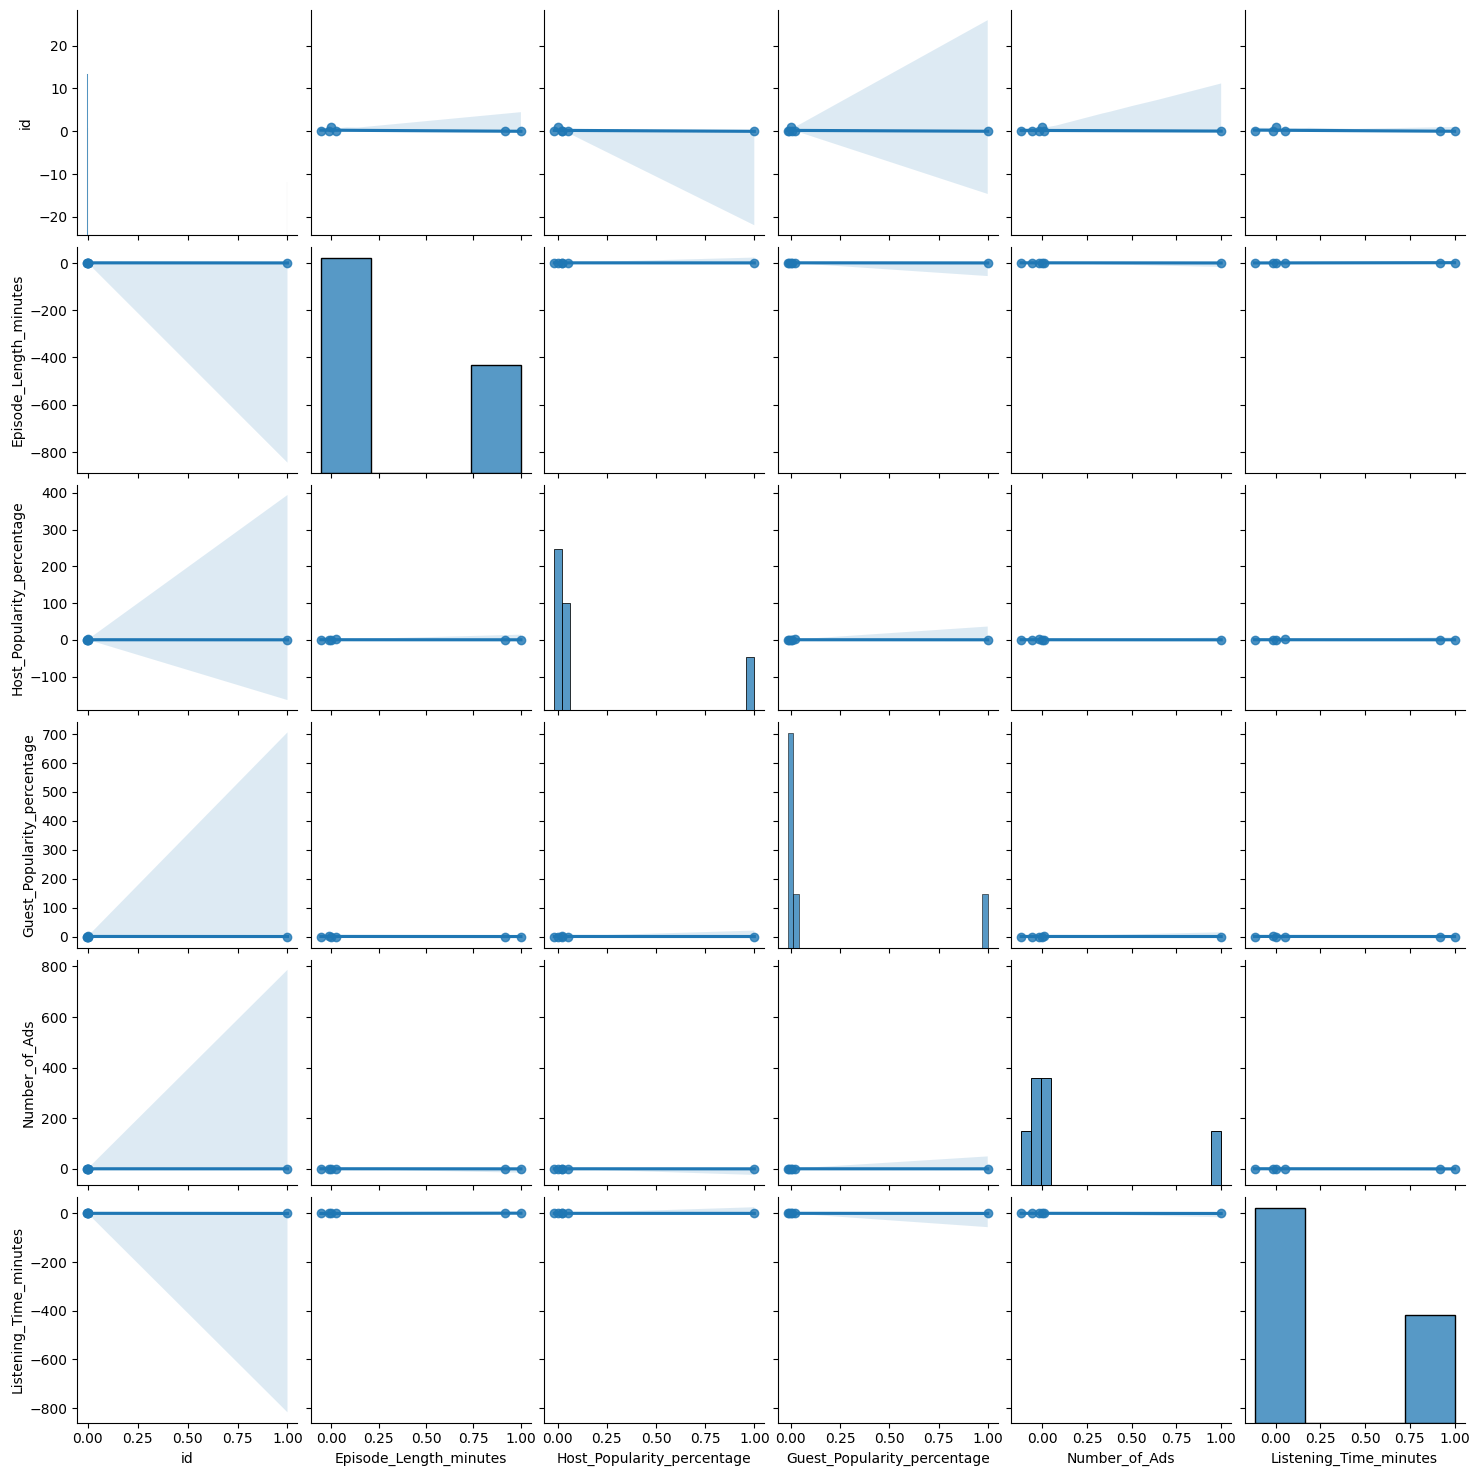

In [13]:
sns.pairplot(df_corr, kind='reg')  # Look for non-linear patterns